# Mitchell Pudil
## Instrumental Variable Simulation Study 
## For Research Assistantship with Dr. Garritt Page, Associate Professor of Statistics at BYU

### Abstract

Instrumental Variable (IV) estimators have generally been used to lower the bias from Ordinary Least Squares (OLS) when performing a regression, due to the fact that IV accounts for endogeneity problems such as omitted variable bias. However, in certain circumstances, it is possible for IV estimators to be more biased than the OLS, even when endogeneity is present. This research will be aimed at presenting those situations in which OLS outperforms IV estimates, through iteratively manipulating variances for the instrumental variable and the endogenous regressor. Further, we determine instances in which the exclusion condition of the IV technique (that the error term is uncorrelated with the instrumental variable) is more important than the inclusion restriction (that there is a correlation between the endogenous regressor and the instrumental variable). 

In [2]:
install.packages("MASS")
install.packages("AER")
install.packages('matrixcalc')
install.packages('corpcor')
install.packages('fields')


library("MASS")
library("AER")
library('matrixcalc')
library('corpcor')
library('fields')

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Loading required package: car
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: survival

Attaching package: ‘corpcor’

The following object is masked from ‘package:matrixcalc’:

    is.positive.definite

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-2 (2017-12-21) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the


### The following variables apply for all simulations:

### Variables used:
#### z: instrumental variable
#### c: omitted variable
#### x: endogenous variable

## Simulation 1: Changing the variance of the instrumental variable

In [3]:
varz <- seq(0.1,0.9, by=0.1)  # set values for the variance of the IV as a sequence of numbers ranging from 0.1 to 0.9
varc <- 1  # set variance of the omitted variable to 1
varx <- 10 # set variance of the endogenous variable to 10


corrcz <- 0.5 # Define correlation between c and z (important for determining bias of IV estimator)
sigmacz <- corrcz*sqrt(varc)*sqrt(varz)


corrxz <- 0.2 # Define correlation between x and z (important for determining bias of OLS estimator)
sigmaxz <- corrxz*sqrt(varz)*sqrt(varx)


outols <- array(NA, c(length(sigmaxz), length(sigmacz),100))   # Define OLS bias array
outiv <- array(NA, c(length(sigmacz), length(sigmacz),100))    # Define IV bias array



for(i in 1:length(sigmaxz)){
  for(j in 1:length(sigmacz)){
    for(k in 1:100){
      
       # Define matrix from which the endogenous, omitted, and instrumental variables come from
      M <- make.positive.definite(matrix(c(varx,0.5,0,0.5,varc,sigmacz[j],0,sigmacz[j],varz[j]),3,3))
      xSzc <- mvrnorm(1000, c(20,15,0), M) 
      x <- xSzc[,1] 
      z <- xSzc[,2] 
      c <- xSzc[,3]   # Mean 0 and sd 1 by default
      
      outols[i,j,k] <- cov(x,c) / var(x)  # Calculate OLS bias
      outiv[i,j,k] <- cov(z,c)/cov(z,x)   # Calculate IV bias
      
    } 
  }
  
}



### Create matrix for OLS bias based off of previous algorithm

In [4]:

heatols <- matrix(0,length(sigmaxz),length(sigmacz))
for(i in 1:100) {
  heatols <- heatols + outols[,,i]
}


avheat <- heatols/100


Now that we have created matrices for the OLS and IV bias, we can create the heat plots.

## Create OLS Heat Plot

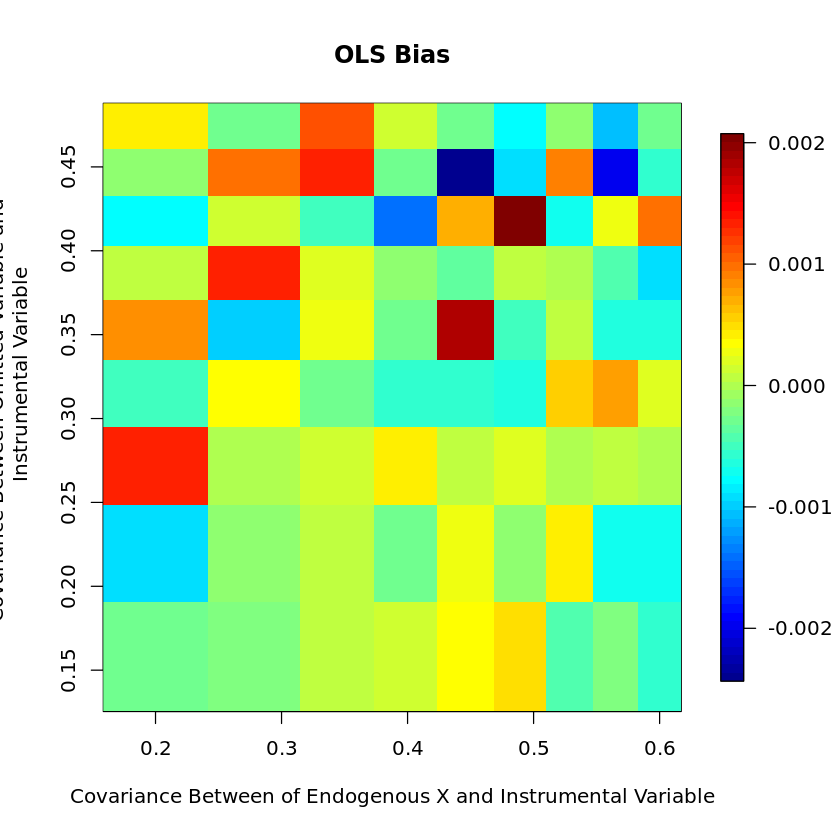

In [5]:
image.plot(sigmaxz, sigmacz, avheat, main='OLS Bias', xlab='Covariance Between of Endogenous X and Instrumental Variable', ylab='Covariance Between Omitted Variable and 
           Instrumental Variable')

We notice that OLS does not produce much bias in this scenario

## Perform the same procedure for the IV Estimator

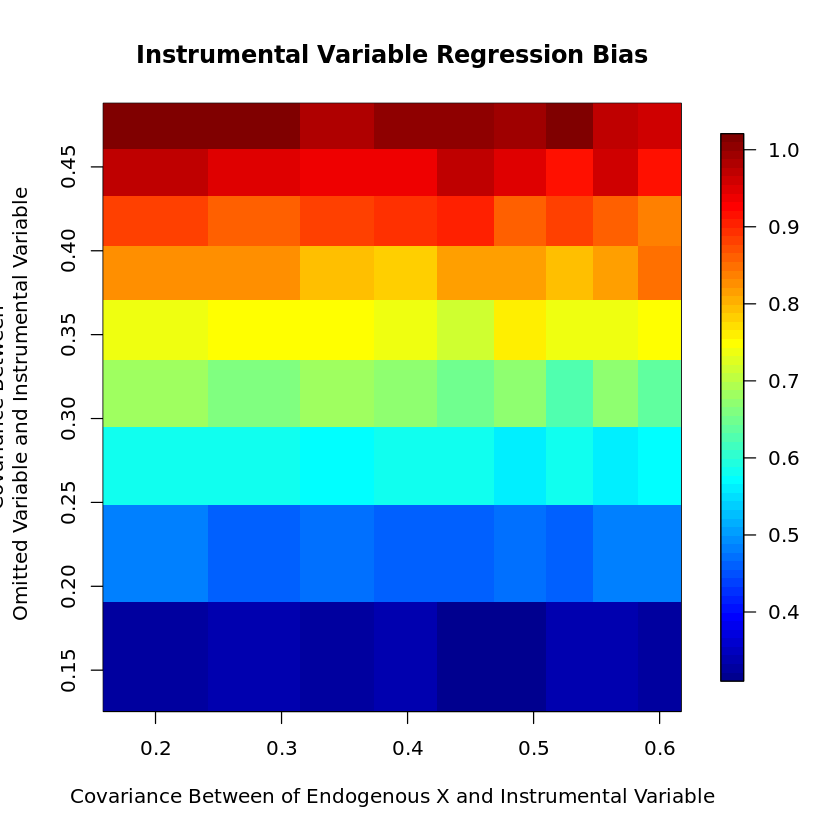

In [6]:
heativ <- NULL


heativ <- matrix(0,length(sigmaxz),length(sigmacz))
for(i in 1:100) {
  heativ <- heativ + outiv[,,i]
}


avheativ <- heativ/100

image.plot(sigmaxz, sigmacz, avheativ, main='Instrumental Variable Regression Bias', xlab='Covariance Between of Endogenous X and Instrumental Variable', 
           ylab='Covariance Between\n Omitted Variable and Instrumental Variable')  





It appears that here, the IV estimator produces more biased estimates as the correlation between the omitted variable and the instrumental variable increases.

## Simulation 2: Changing the correlation between the omitted variable and the instrument 

In [8]:
corrxz <- seq(-1,1,by=0.097)
sigmaxS <- NULL
for(i in 1:length(corrxz)){
  sigmaxS <- (1/corrxz)-1
}

corrcz <- seq(-1,1,by=0.097)
varz <- 1
varc <- 1
sigmacz <- corrcz * sqrt(varz) * sqrt(varc)

outols <- array(NA, c(length(corrxz), length(corrcz),100))
outiv <- array(NA, c(length(corrxz), length(corrcz),100))



for(i in 1:length(corrxz)){
  for(j in 1:length(corrcz)){
    for(k in 1:100){
      
      M <- make.positive.definite(matrix(c(sigmaxS[i]^2,0.5,0,0.5,varc,sigmacz[j],0,sigmacz[j],varz),3,3))
      xSzc <- mvrnorm(1000, c(20,15,0), M) 
      xStar <- xSzc[,1] 
      z <- xSzc[,2] 
      c <- xSzc[,3]   # Mean 0 and sd 1 by default
      x <- xStar + z 
      
      outols[i,j,k] <- cov(x,c) / var(x)
      outiv[i,j,k] <- sigmacz[j] / sd(z)

    } 
  }

}


### OLS Heat Plot

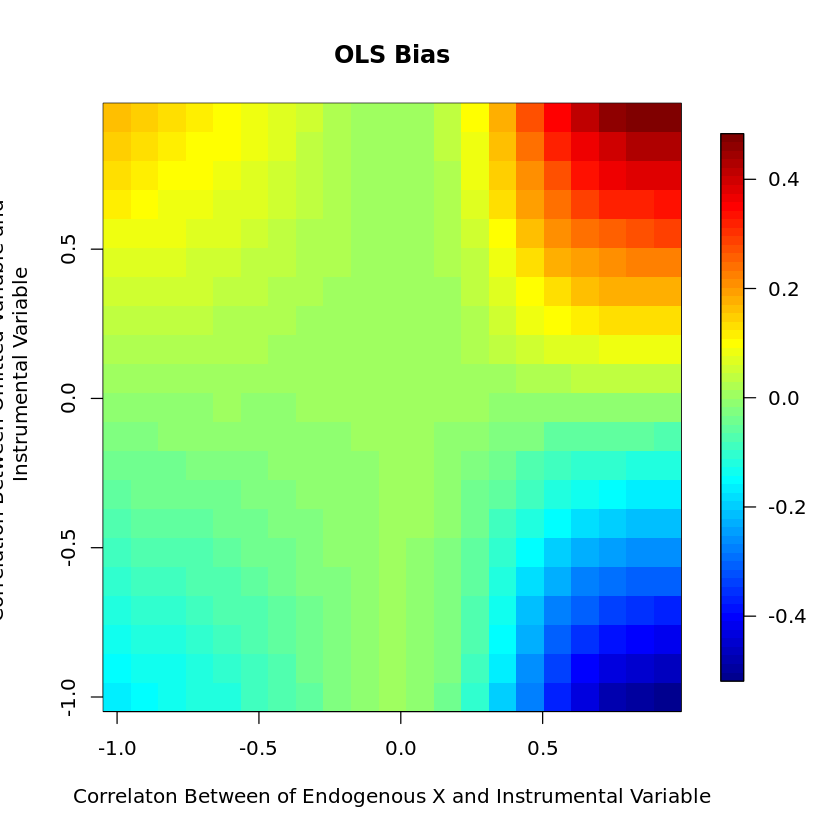

In [9]:
heatols <- matrix(0,length(corrxz),length(corrcz))
for(i in 1:100) {
  heatols <- heatols + outols[,,i]
}


avheat <- heatols/100


image.plot(corrxz, corrcz, avheat, main='OLS Bias', xlab='Correlaton Between of Endogenous X and Instrumental Variable', ylab='Correlation Between Omitted Variable and 
           Instrumental Variable')



This graph looks at the OLS bias for different values of correlation between 1. the omitted variable and the instrumental variable and 2. the endogenous variable and the instrumental variable. We can see that unbiasedness occurs when either there is no relationship between the endogenous variable and the instrumental variable and/or when there is no relationship between the omitted variable and the instrumental variable (green section). However, when either of these is violated, there is bias, to varying degrees. For example, the red area in the top right of the OLS Bias curve suggests high positive bias, since there is a high correlation between both, so we have omitted variable bias. This bias is slightly moderated in the top left, but still has some positive bias. 

Generally, the bias for the OLS estimator is defined as cov(x,u) / var(x) where u is the error term

### IV Heat Plot

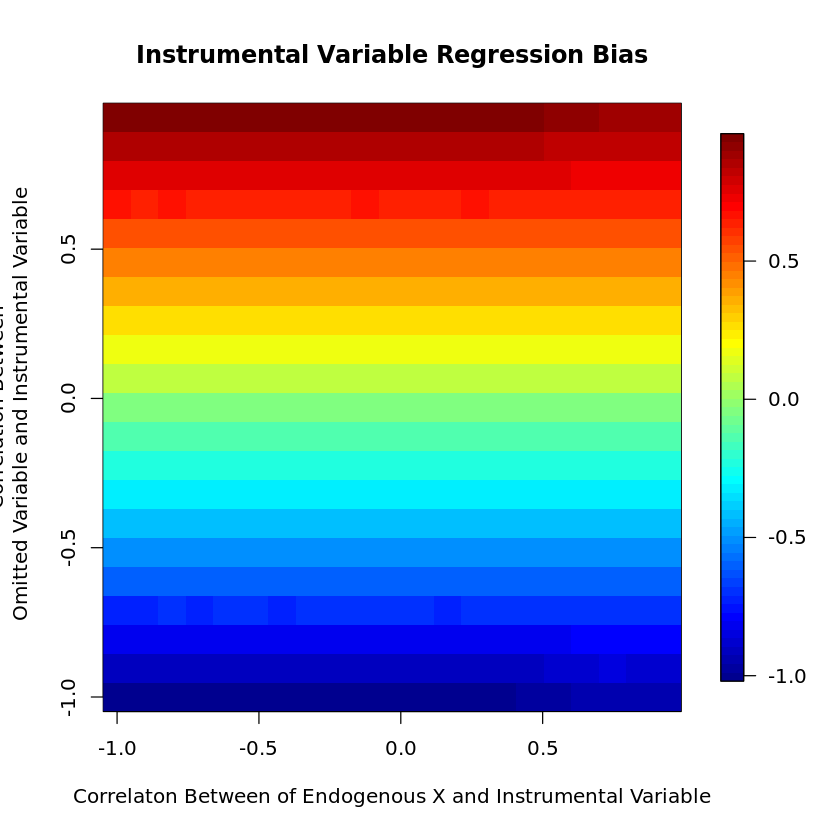

In [10]:
heativ <- NULL


# For IV estimator
heativ <- matrix(0,length(corrxz),length(corrcz))
for(i in 1:100) {
  heativ <- heativ + outiv[,,i]
}


avheativ <- heativ/100


image.plot(corrxz, corrcz, avheativ, main='Instrumental Variable Regression Bias', xlab='Correlaton Between of Endogenous X and Instrumental Variable', 
           ylab='Correlation Between\n Omitted Variable and Instrumental Variable')


For the IV Bias, we can see that there is bias whenever there is a correlation between omitted variable and instrumental variable (exclusion condition not met) but when there is no correlation between the omitted variable and the instrumental variable AND there IS correlation between the endogenous variable and the instrumental variable (exclusion AND inclusion restrictions met), then there is no bias in the IV estimator. We also see that when the correlation between the endogenous X and the instrumental variable is around 0, the IV estimator is inconsistent. 

The bias for the IV estimator is generally defined as: cov(z,u) / cov(z,x) where u is the error term.